# Regresja logistyczna
### Karolina Piotrowska

In [120]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

In [121]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h


def calculate_cost(X, y, theta):
    h = h_fun(X, theta)+1e-12
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]


def get_line(X, y, theta = np.array([[0], [0]]), eps = 1e-5, alpha = 0.001):
    prev_cost = calculate_cost(X, y, theta)
    m = X.shape[1]

    while(1):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - (alpha/m) * gradient.T
        cost = calculate_cost(X, y, theta)
        if np.abs(cost - prev_cost) < eps:
            return (theta, cost)
        else:
            prev_cost = cost

X.shape=(2, 8)
y.shape=(1, 8)
(array([[-12.7644518 ],
       [  4.93909342]]), 0.07715876579444059)


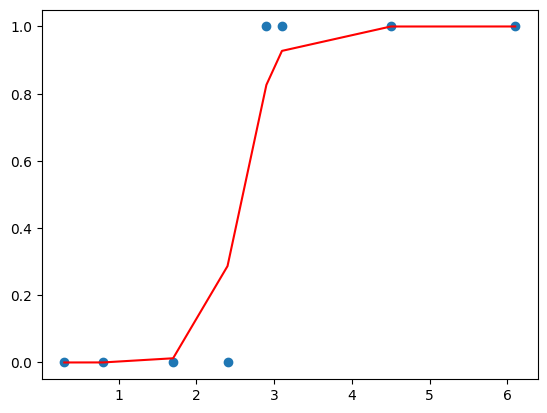

In [122]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

(theta, cost) = get_line(X, y, alpha=0.2)
print((theta, cost))

fig, ax = plt.subplots()
ax.scatter(X[1,:], y)
ax.plot(X[1,:], h_fun(X, theta)[0, :], 'r')

In [123]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(3, 100)
y.shape=(1, 100)


(array([[-0.00046023],
       [ 0.0077177 ],
       [ 0.00311343]]), 0.6303623293711309)


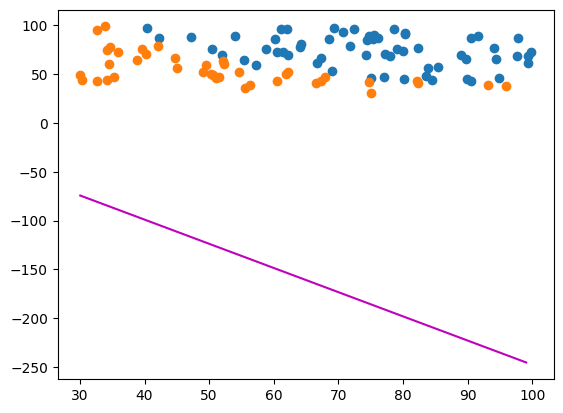

In [124]:
(theta, cost) = get_line(X, y, theta=np.array([[0], [0], [0]]), eps=1e-5, alpha=0.0001)
print((theta, cost))

y_b = np.array(y[0,:], dtype=bool)
X1 = X[1,:]
X2 = X[2,:]

x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db

fig, ax = plt.subplots()
ax.scatter(X1[y_b], X2[y_b])
ax.scatter(X1[y_b == 0], X2[y_b == 0])
plt.plot(x1_db, x2_db, '-m')